In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("All library loaded !!!!")


All library loaded !!!!


# pivot table is super useful and this a shortcart

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.groupby(df['sex'])['total_bill'].mean().rename({'sex':'Gender','value':'Avg_Money'})

C:\Users\Alam Pranto\AppData\Local\Temp\ipykernel_11208\2484386348.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df['sex'])['total_bill'].mean().rename({'sex':'Gender','value':'Avg_Money'})


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [5]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')

C:\Users\Alam Pranto\AppData\Local\Temp\ipykernel_11208\2608939217.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [6]:
# all cols together
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values=['total_bill'],aggfunc={'total_bill':'mean','total_bill':'max','total_bill':'min'})

C:\Users\Alam Pranto\AppData\Local\Temp\ipykernel_11208\3229213443.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values=['total_bill'],aggfunc={'total_bill':'mean','total_bill':'max','total_bill':'min'})


total_bill                                   
day                 Thur           Fri           Sat    Sun
time               Lunch Dinner  Lunch Dinner Dinner Dinner
sex    smoker                                              
Male   Yes         10.34    NaN   8.58  12.03   7.74   7.25
       No           7.51    NaN    NaN  12.46   9.55   8.77
Female Yes         12.74    NaN  10.09   5.75   3.07   9.60
       No           8.35  18.78  15.98  22.75   7.25  10.29

In [7]:
expense=pd.read_csv('D:\Problem solving\Problem_solving\python\seation 22\expense_data.csv')
expense.info()
expense.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alam Pranto\AppData\Local\Temp\ipykernel_11208\3298889732.py:1: SyntaxWarning: invalid escape sequence '\P'
  expense=pd.read_csv('D:\Problem solving\Problem_solving\python\seation 22\expense_data.csv')


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [8]:

# date=[]
# def ADD_value(list):
#     date.append(list[0])

# expense['Date'].str.split(' ').apply(ADD_value)

# expense.drop(columns='only_date',inplace=True) 
# expense['only_date']=date
# expense


# -----------------------convert date time-----------------------
expense['Date']=pd.to_datetime(expense['Date'])
expense.info()
# ----------------
expense['Month']=expense['Date'].dt.month_name()

print(expense.Category.unique())

print(expense['Month'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB
['Food' 'Other' 'Transportation' 'Social Life' 'Household' 'Apparel'
 'Education' 'Salary' 'Allowance' 'Self-development' 'Beauty' 'Gift'
 'Petty c

Text(0.5, 0, 'Category')

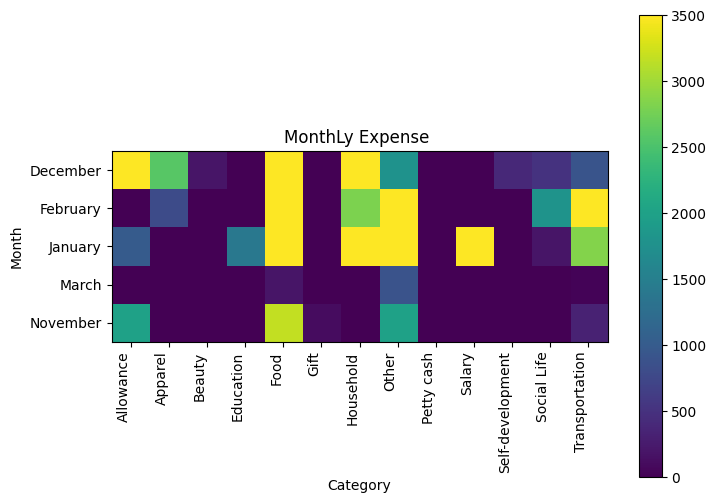

In [9]:
graps=expense.pivot_table(index='Month',columns='Category',values='INR',aggfunc='sum',fill_value=0)
plt.figure(figsize=(8,6))
plt.imshow(graps,vmax=3500,vmin=0)
plt.xticks(ticks=np.arange(len(graps.columns)), labels=graps.columns, rotation=90, ha='right')
plt.yticks(ticks=range(len(graps.index)), labels=graps.index)
plt.colorbar()
plt.title("MonthLy Expense ")
plt.ylabel("Month")
plt.xlabel("Category")

# expense.groupby(['only_date','Category'])['INR'].sum()





# Most Important for textual data (Topic is vectorized String)

In [10]:
# why do we need vectorized string?
s=['car','dog',None,'rat']

[i.startwith('c') for i in s]

# because string can't handle with none value so solve this problem by pandas vectorized string

AttributeError: 'str' object has no attribute 'startwith'

In [ ]:
s=pd.Series(['car','dog',None,'rat'])

s.str.startswith('c')

# s[s.str.startswith('c',na=False)]

0     True
1    False
2     None
3    False
dtype: object

In [ ]:
titanic=pd.read_csv('D:\Problem solving\Problem_solving\python\seation 22/titanic.csv')
titanic['Name']

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alam Pranto\AppData\Local\Temp\ipykernel_16324\1055979975.py:1: SyntaxWarning: invalid escape sequence '\P'
  titanic=pd.read_csv('D:\Problem solving\Problem_solving\python\seation 22/titanic.csv')


0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# titanic['Name'].str.lower()
# titanic['Name'].str.upper()
# titanic['Name'].str.capitalize()

# find largest name

# titanic['Name'][titanic['Name'].str.len() == 82].values[0]

# titanic['Name'].str.strip() #spaces remove





0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
titanic['Surname']=titanic['Name'].str.split().str.get(0)

titanic



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"Montvila,"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"Graham,"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Johnston,"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"Behr,"


In [ ]:
titanic[['Title','FirstName']]=titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
titanic['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [ ]:
# replace
titanic['Title']=titanic['Title'].str.replace('Ms.','Miss.')

titanic['Title']=titanic['Title'].str.replace('Mlle.','Miss.')

titanic['Title'].value_counts()

Title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Lady.          1
Mme.           1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [ ]:
# filtering
# find those people who's name start with a ?
titanic[titanic['FirstName'].str.startswith('A')].shape


(95, 15)

In [ ]:
# applying regex
titanic[titanic['FirstName'].str.contains('john',case=False)]

# find those people which name start with vowel


titanic[titanic['FirstName'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,FirstName
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,"Rice,",Master.,Eugene
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.0000,NaN,S,Vander,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN,"Icard,",Miss.,Amelie
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,"Stewart,",Mr.,Albert A
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S,"Andersson,",Miss.,Erna Alexandra
80,81,0,3,"Waelens, Mr. Achille",male,22.00,0,0,345767,9.0000,NaN,S,"Waelens,",Mr.,Achille
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,NaN,S,"Salkjelsvik,",Miss.,Anna Kristine
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,"Andersson,",Miss.,Ellis Anna Maria
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,"Peter,",Miss.,Anna
135,136,0,2,"Richard, Mr. Emile",male,23.00,0,0,SC/PARIS 2133,15.0458,NaN,C,"Richard,",Mr.,Emile


# TimeStamp Object

In [ ]:
# create and timestamp 
type(pd.Timestamp('2025/01/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# generate date
pd.date_range(start='2025/01/05',end='2025/02/28',freq='W-Fri')


DatetimeIndex(['2025-01-10', '2025-01-17', '2025-01-24', '2025-01-31',
               '2025-02-07', '2025-02-14', '2025-02-21', '2025-02-28'],
              dtype='datetime64[ns]', freq='W-FRI')

In [ ]:
pd.date_range(start='2025/01/05',end='2025/02/28',freq='MS')

DatetimeIndex(['2025-02-01'], dtype='datetime64[ns]', freq='MS')